Integrantes: Melisa Nuñez, David Bejar

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 9.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=e77aa7da5ebdf8a58d9620ce63bc892113e24dffe8af12bceb63f1353a1e5b56
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName("Ej1").config('spark.ui.port','4050').getOrCreate()

In [ ]:
df = spark.read.csv('/content/drive/MyDrive/Proyecto/NARVAEZ OCHOA Y PARDO FLORES TESIS TERMINADA.csv',inferSchema=True,header=True)

In [ ]:
df.show()

+--------------------------------------------+----+----+----+----+----+----+
|REPOSITORIO NACIONAL EN CIENCIA Y TECNOLOGÍA| _c1| _c2| _c3| _c4| _c5| _c6|
+--------------------------------------------+----+----+----+----+----+----+
|                        FICHA DE REGISTRO...|null|null|null|null|null|null|
|                        “El Desempleo de ...|null|null|null|null|null|null|
|                         TÍTULO Y SUBTÍTULO:|null|null|null|null|null|null|
|                        de planificación ...|null|null|null|null|null|null|
|                        AUTOR(ES) Narváez...|null|null|null|null|null|null|
|                        (apellidos/nombre...|null|null|null|null|null|null|
|                        REVISOR(ES)/TUTOR...|null|null|null|null|null|null|
|                        (apellidos/nombres):|null|null|null|null|null|null|
|                        INSTITUCIÓN: Univ...|null|null|null|null|null|null|
|                        UNIDAD/FACULTAD: ...|null|null|null|null|null|null|

In [ ]:
df.na.drop().show()

+--------------------------------------------+---+---+---+---+---+---+
|REPOSITORIO NACIONAL EN CIENCIA Y TECNOLOGÍA|_c1|_c2|_c3|_c4|_c5|_c6|
+--------------------------------------------+---+---+---+---+---+---+
+--------------------------------------------+---+---+---+---+---+---+



In [ ]:
def sparkShape(dataFrame):
  return (df.count(),len(df.columns))

In [ ]:
sparkShape(df)

(183, 7)

In [ ]:
df.groupBy('REPOSITORIO NACIONAL EN CIENCIA Y TECNOLOGÍA').count().show()

+--------------------------------------------+-----+
|REPOSITORIO NACIONAL EN CIENCIA Y TECNOLOGÍA|count|
+--------------------------------------------+-----+
|                                       Total|    1|
|                                    y edad."|    1|
|                        Empleado u obrero...|    1|
|                          Desempleo  445.172|    1|
|                        Empleado(a) obrer...|    1|
|                                  Patrono(a)|    1|
|                        4. Señalar las po...|    1|
|                               Independiente|    1|
|                        complejo que refl...|    1|
|                                        Sexo|    1|
|                             De 36 a 64 años|    2|
|                        AUTOR(ES) Narváez...|    1|
|                        Personas con Disc...|    1|
|                        de planificación ...|    1|
|                         Coeficiente de GINI|    1|
|                        Empleo no clasifi...|

In [ ]:
#df_Spacio=df.strip()
#df_Spacio.show()

In [ ]:
df = df.drop('_c1')
df = df.drop('_c2')
df = df.drop('_c3')
df = df.drop('_c4')
df = df.drop('_c5')
df = df.drop('_c6')
df.show()

+--------------------------------------------+
|REPOSITORIO NACIONAL EN CIENCIA Y TECNOLOGÍA|
+--------------------------------------------+
|                        FICHA DE REGISTRO...|
|                        “El Desempleo de ...|
|                         TÍTULO Y SUBTÍTULO:|
|                        de planificación ...|
|                        AUTOR(ES) Narváez...|
|                        (apellidos/nombre...|
|                        REVISOR(ES)/TUTOR...|
|                        (apellidos/nombres):|
|                        INSTITUCIÓN: Univ...|
|                        UNIDAD/FACULTAD: ...|
|                        MAESTRÍA/ESPECIAL...|
|                        GRADO OBTENIDO: E...|
|                        FECHA DE PUBLICAC...|
|                        Economía y Desarr...|
|                        ÁREAS TEMÁTICAS: ...|
|                         análisis económico)|
|                        Discapacidad, Inc...|
|                        PALABRAS CLAVES/ ...|
|            

##TO PANDAS TRANSFORMA PYSPARK EN PANDAS

In [ ]:
dfpanda = df.toPandas()

In [ ]:
dfpanda.head(10)

,REPOSITORIO NACIONAL EN CIENCIA Y TECNOLOGÍA
0,FICHA DE REGISTRO DE TRABAJO DE TITULACIÓN
1,“El Desempleo de las personas con discapacidad...
2,TÍTULO Y SUBTÍTULO:
3,de planificación 9 del ecuador. Periodo 2016-2...
4,AUTOR(ES) Narváez Ochoa Ginger Madelaine
5,(apellidos/nombres): Pardo Flores Rosa María
6,REVISOR(ES)/TUTOR(ES) Ing. Aguilar Sinche Marí...
7,(apellidos/nombres):
8,INSTITUCIÓN: Universidad de Guayaquil
9,UNIDAD/FACULTAD: Facultad de Ciencias Económicas


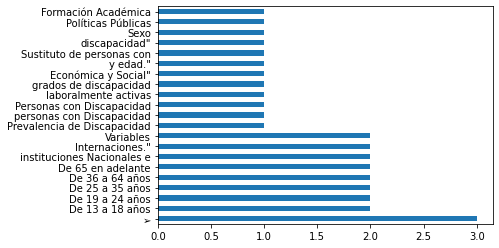

In [ ]:
dfpanda['REPOSITORIO NACIONAL EN CIENCIA Y TECNOLOGÍA'].value_counts()[:21].plot(kind='barh')

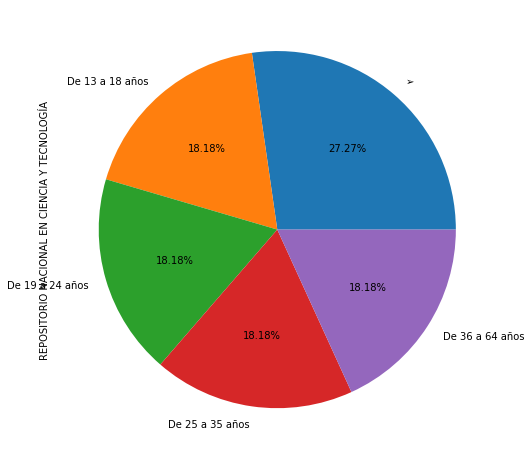

In [ ]:
dfpanda['REPOSITORIO NACIONAL EN CIENCIA Y TECNOLOGÍA'].value_counts().head(5).plot.pie(autopct='%.2f%%',figsize=(8,10))

##Lda WITH PANDA

In [ ]:
corpus = list(dfpanda['REPOSITORIO NACIONAL EN CIENCIA Y TECNOLOGÍA'])
print(len(corpus))
palabras_vacias = [linea.rstrip('\n') for linea in open ('/content/drive/My Drive/database/spanish.txt')]
len(palabras_vacias)

183


608

In [ ]:
import re
def clean_text(t):
  t = str(t)
  t = re.sub(r'\d+',' ',t)
  t = re.sub(r'[^\w\n]',' ',t)
  t = re.sub(r'\s\s+',' ',t)
  t = t.lower()
  return t

In [ ]:
corpus = [clean_text(t) for t in corpus]

In [ ]:
corpus

['ficha de registro de trabajo de titulación',
 ' el desempleo de las personas con discapacidad en la zona',
 'título y subtítulo ',
 'de planificación del ecuador periodo ',
 'autor es narváez ochoa ginger madelaine',
 ' apellidos nombres pardo flores rosa maría',
 'revisor es tutor es ing aguilar sinche maría belén mgs ',
 ' apellidos nombres ',
 'institución universidad de guayaquil',
 'unidad facultad facultad de ciencias económicas',
 'maestría especialidad economía modalidad semestral',
 'grado obtenido economista',
 'fecha de publicación octubre no de páginas ',
 'economía y desarrollo local',
 'áreas temáticas desarrollo territorial demografía proceso productivo ',
 'análisis económico ',
 'discapacidad inclusión laboral mercado laboral políticas',
 'palabras claves keywords públicas ',
 'resumen abstract palabras ',
 'el proyecto de investigación realizado tiene como finalidad brindar información para tener un',
 'mayor conocimiento de los problemas y necesidades que afrontan 

# Matriz TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words= palabras_vacias,sublinear_tf=True)
x = vectorizer.fit_transform(corpus)
vocab = vectorizer.get_feature_names_out()

In [ ]:
vocab = vectorizer.get_feature_names_out()
len(vocab)

254

In [ ]:
print(x.shape)

(183, 254)


#k-meas

In [ ]:
vocab

array(['abstract', 'académica', 'acceso', 'aceptados', 'activa',
       'activas', 'actividad', 'adaptado', 'adecuado', 'adjunto',
       'afrontan', 'aguilar', 'analizadas', 'andrade', 'andradem',
       'antecedentes', 'análisis', 'apellidos', 'aportar', 'aumentar',
       'autor', 'años', 'belén', 'beneficiarios', 'brindar', 'búsqueda',
       'cantidad', 'características', 'carácter', 'causas', 'censo',
       'ciencias', 'clasificado', 'claves', 'coeficiente', 'complejo',
       'concernientes', 'condiciones', 'conformada', 'conocimiento',
       'consejo', 'contacto', 'contraposición', 'contratación', 'crear',
       'declarado', 'demografía', 'dependiente', 'desarrollo',
       'describir', 'descripción', 'desempleo', 'detener', 'determinar',
       'diario', 'discapacidad', 'discapacidades', 'discapacitadas',
       'discapacitados', 'distrito', 'documental', 'doméstico', 'ec',
       'econ', 'economista', 'economía', 'económica', 'económicamente',
       'económicas', 'económi

In [ ]:
from sklearn.cluster import KMeans
ckm = KMeans(n_clusters=10).fit(x)
ckm

KMeans(n_clusters=10)

In [ ]:
dfpanda ['kmeans'] = ckm.labels_
dfpanda

,REPOSITORIO NACIONAL EN CIENCIA Y TECNOLOGÍA,kmeans,lda
0,FICHA DE REGISTRO DE TRABAJO DE TITULACIÓN,0,8
1,“El Desempleo de las personas con discapacidad...,5,1
2,TÍTULO Y SUBTÍTULO:,0,0
3,de planificación 9 del ecuador. Periodo 2016-2...,0,9
4,AUTOR(ES) Narváez Ochoa Ginger Madelaine,0,0
...,...,...,...
178,None,7,4
179,None,7,4
180,None,7,4
181,None,7,4


In [ ]:
dfpanda[['REPOSITORIO NACIONAL EN CIENCIA Y TECNOLOGÍA','kmeans']].to_excel("/content/drive/My Drive/database/Proyecto_reviews_kmeans.xls")

<ipython-input-40-12d077831f2c>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  dfpanda[['REPOSITORIO NACIONAL EN CIENCIA Y TECNOLOGÍA','kmeans']].to_excel("/content/drive/My Drive/database/Proyecto_reviews_kmeans.xls")


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


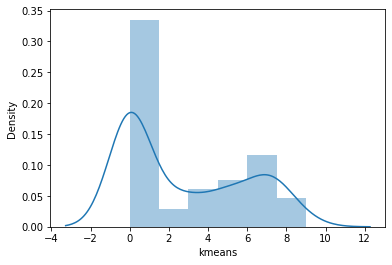

In [ ]:
import seaborn as sns
sns.distplot(dfpanda['kmeans'])

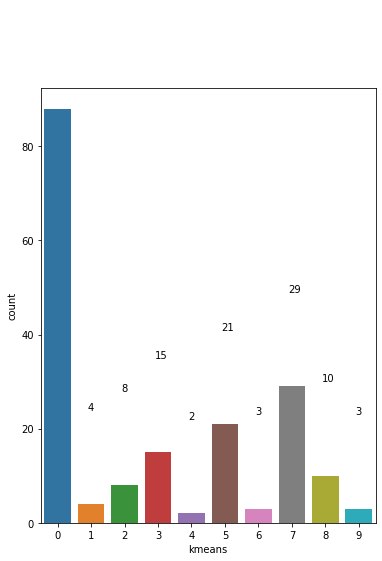

In [ ]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 8))

sns.countplot(x="kmeans", data=dfpanda)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 20))

In [ ]:
from sklearn.preprocessing import StandardScaler
dfpanda = dfpanda[['REPOSITORIO NACIONAL EN CIENCIA Y TECNOLOGÍA','kmeans']]
print('Total Row : ', len(dfpanda))

## Feature Scaling
sc_dfa = StandardScaler()
#dfa_std = sc_dfa.fit_transform(df.astype(float))
sc_dfa

Total Row :  183


StandardScaler()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [7,5]
for n_clusters in range_n_clusters:
 
 clusterer = KMeans(n_clusters=n_clusters, random_state=10)
 cluster_labels = clusterer.fit_predict(x)
 silhouette_avg = silhouette_score(x, cluster_labels)
 print( "For n_clusters =", 
          n_clusters, 
        "The average silhouette_score is :", 
          silhouette_avg, )

For n_clusters = 7 The average silhouette_score is : 0.2520974173686539
For n_clusters = 5 The average silhouette_score is : 0.2387236643276037


# LDA 

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

In [ ]:
lda_model = LatentDirichletAllocation(n_components=10,random_state=1)
lda = lda_model.fit_transform(x)

In [ ]:
tp_palabras = {}
n_top_pal = 10
for topico, comp in enumerate(lda_model.components_):
  pal_ind = np.argsort(comp)[::-1][:n_top_pal]
  tp_palabras[topico] = [vocab[i] for i in pal_ind]

In [ ]:
for topico, palabras in tp_palabras.items():
  print("Topico {} : {}".format(topico,' ,'.join(palabras)))

Topico 0 : personas ,pleno ,adecuado ,discapacitadas ,discapacidad ,describir ,desempleo ,zona ,formación ,ordinaria
Topico 1 : discapacidad ,personas ,zona ,sexo ,prevalencia ,grado ,grados ,pichincha ,discapacidades ,actividad
Topico 2 : instituciones ,población ,nacionales ,características ,independientes ,situación ,metropolitana ,estatales ,queriendo ,pudiendo
Topico 3 : documental ,ocupación ,análisis ,obrero ,activas ,laboralmente ,empleado ,económico ,gob ,ecuadorencifras
Topico 4 : none ,desempleo ,tasa ,censo ,estadística ,privado ,obrero ,empleado ,causas ,influyen
Topico 5 : pea ,políticas ,independiente ,general ,públicas ,objetivo ,proyecto ,brindar ,finalidad ,investigación
Topico 6 : públicas ,ecuador ,planificación ,específicos ,adjunto ,pdf ,laboral ,objetivos ,desarrollo ,inclusión
Topico 7 : discapacidad ,dependiente ,remunerado ,socio ,declarado ,fenómeno ,doméstico ,trabajador ,social ,económica
Topico 8 : variables ,personas ,ug ,edu ,sustituto ,ec ,inserción ,hu

In [ ]:
topicos = []
for n in range(lda.shape[0]):
  topicos.append(lda[n].argmax())
dfpanda['lda'] = topicos

In [ ]:
dfpanda

,REPOSITORIO NACIONAL EN CIENCIA Y TECNOLOGÍA,kmeans,lda
0,FICHA DE REGISTRO DE TRABAJO DE TITULACIÓN,0,8
1,“El Desempleo de las personas con discapacidad...,5,1
2,TÍTULO Y SUBTÍTULO:,0,0
3,de planificación 9 del ecuador. Periodo 2016-2...,0,9
4,AUTOR(ES) Narváez Ochoa Ginger Madelaine,0,0
...,...,...,...
178,None,7,4
179,None,7,4
180,None,7,4
181,None,7,4
